In [5]:
import requests

url= 'https://github.com/IntroToCompBioLSU-Spr20/CustomFunctions_Plotting_Week11/blob/master/covidData_4.7.20.csv'

r=requests.get(url)

with open("covidData.csv","wb") as code:

    code.write(r.content)

# Import needed modules here

import re

import matplotlib.pyplot as plt

import numpy as np

import copy

Enter a state:Louisiana
Enter a statistic either cases or deaths:cases


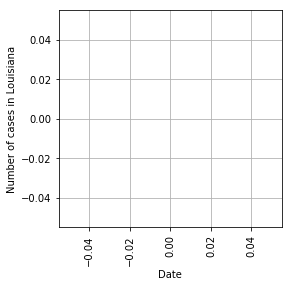

In [13]:
def effectOnState(covidData ='covidData.csv', state = 'Louisiana', data= 'cases'):
    """Refers to covidData.csv file, and automatically narrows down to data from input state and statistic type either cases or deaths."""
    cumulativeTotal = []
    #Opens file and generates a list of dates from the input state ensuring no date is repeated 
    with open(covidData,'r') as file:
            dates = re.findall(r"(.+),.+,{},.+,.+,.+".format(state),file.read())
            listOfDates = []
            for i in dates:
                if i in listOfDates:
                    pass
                # appends the sum at that date to the list from the beginning of the function for cumulative totals
                elif i not in listOfDates:
                    listOfDates.append(i)
            file.close()
# Checks if the input is cases 
    if data == "cases": 
# For each date in listOfDates
        for date in listOfDates: 
            with open(covidData, 'r') as file:
                casesOnSameDate = re.findall(r'{},.+,{},.+,(.+),.+'.format(date,state),file.read())
                casesOnSameDate = [int(i) for i in casesOnSameDate]
                # adds the count of cases in every county of specified state on that date
                cumulativeTotal.append(sum(casesOnSameDate)) 


            file.close()
#Checks if input is deaths
    elif data == "deaths":
        for date in listOfDates:
            with open(covidData, 'r') as file:
                deathsOnSameDate = re.findall(r'{},.+,{},.+,.+,(.+)'.format(date,state),file.read())
                deathsOnSameDate = [int(i) for i in deathsInSameDate]
                # adds the count of deaths in every county of specified state on that date
                cumulativeTotal.append(sum(deathsInSameDate))
            file.close()
    else:
        print('Input error: statistic must be either cases or deaths')
    
    #Checks that listOfDates and cumulativeTotal are same length
    if len(listOfDates) == len(cumulativeTotal): 
        #stores both values in a variable and returns them
        length = [listOfDates,cumulativeTotal] 
        return length 

    else:
        print("Functional Error")     

# Use your function to create a plot here
#Prompts user for a state and stores input as a variable
stateInput = input("Enter a state:")
#Prompts user for counts or deaths and stores input as a variable
dataInput = input("Enter a statistic either cases or deaths:") 
#creates a function using the inputs
function = effectOnState(state = stateInput, data = dataInput) 
# Assign plt plot paramaters
plt.figure(figsize = (4,4))
plt.ylabel('Number of {} in {}'.format(dataInput, stateInput))
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.grid(True)
plt.plot(function[0],function[1])
plt.show()



Enter county:Jefferson
Enter the state containing the input county:Louisiana
Enter statistic either cases or deaths :deaths


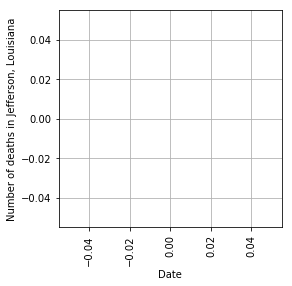

In [11]:
def casesPerCounty(covidData = 'covidData.csv', county = 'Jefferson',state = 'Louisiana', data = 'cases'):
    """Refers to covidData.csv file, and shows input statistic type over time from input state and county."""
    cumulativeTotal = []

    #Opens file and generates a list of dates from the input county and state
    with open(covidData,'r') as file: 
        listOfDates = re.findall(r"(.+),{},{},.+,.+,.+".format(county,state),file.read()) 
        file.close()
   # Checks if the input is cases 
    if data == 'cases': 
        for date in listOfDates:
            with open(data, 'r') as file:
                # For each date in listOfDates it finds the statistic based on state and county
                casesOnSameDate = int(re.search(r'{},{},{},.+,(.+),.+'.format(date,county,state),file.read()).group(1)) 
                 #  Appends the statistic at date to cumulativeTotal
                cumulativeTotal.append(casesOnSameDate)   
                file.close()
    elif data == 'deaths':
        for date in listOfDates:
            with open(data, 'r') as file:
                deathsOnSameDate= int(re.search(r'{},{},{},.+,.+,(.+)'.format(date,county,state),file.read()).group(1))
                cumulativeTotal.append(deathsOnSameDate)   
                file.close()
    else:
        print('Input error: statistic must be either cases or deaths')
#Checks that listOfDates and cumulativeTotal are same length
    if len(listOfDates) == len(cumulativeTotal): 
  #stores both values in a variable and returns them
        length = [listOfDates,cumulativeTotal] 
        return length 

    else:
        print("Functional Error")
# Use your function to create a plot here
#prompts user for inputs of county, state, and stattistic
countyInput = input("Enter county:") 
stateInput = input("Enter the state containing the input county:") 
dataInput = input("Enter statistic either cases or deaths :") 
#creates a function using the inputs
function = casesPerCounty(county = countyInput, state = stateInput, data = dataInput) 
# assign plt plot paramaters
plt.figure(figsize = (4,4))
plt.ylabel('Number of {} in {}, {}'.format(dataInput,countyInput,stateInput))
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.grid(True)
plt.plot(function[0],function[1])
plt.show()
